In [8]:
import matplotlib.pyplot as plt
import random
import math
from itertools import permutations

In [9]:
class City:
    ''' Class to encapsulate every city in the TSP '''

    def __init__(self, x, y, name) -> None:
        self.x = x
        self.y  = y
        self.name = name

    def coordinates(self):
        return self.x, self.y


class TSPmap:
    cities = {}

    '''coordinates'''
    def cities_x(self):
        return list(map(lambda c: c.x, list(self.cities.values())))
    
    def cities_y(self):
        return list(map(lambda c: c.y, list(self.cities.values())))
    
    '''distance'''
    def city_distance(self, city1, city2):
        return math.sqrt((city1.x - city2.x)**2 + (city1.y - city2.y)**2)
    
    def route_distance(self, route):
        distance = 0
        for (name1, name2) in zip(route, route[1:]):
            distance += self.city_distance(self.cities[name1], self.cities[name2])
        return distance

    '''routes'''
    def generate_route(self):
        route = list(range(len(self.cities)))
        random.shuffle(route)
        return route
    
    def generate_routes(self, N):
        return list(permutations(range(len(self.cities.values()))))[:N]
    
    def route_fitness(self, route):
        return 1 / float(self.route_distance(route))

    '''plotting'''
    def plot_map(self):
        fig = plt.figure()
        plt.scatter(self.cities_x(), self.cities_y())
        plt.show()

    def plot_route(self, route):
        for name1, name2 in zip(route, route[1:]):
            x1, y1 = self.cities[name1].coordinates()
            x2, y2 = self.cities[name2].coordinates()
            plt.plot([x1, x2], [y1, y2], 'blue')
        plt.show()

    


In [10]:
tsp_map = TSPmap()

with open('file-tsp.txt') as f:
    name = 0
    for line in f:
        line = line.strip()
        x = float(line[:7])
        y = float(line[7:].strip())
        tsp_map.cities[name] = City(x, y, str(name))
        name +=1


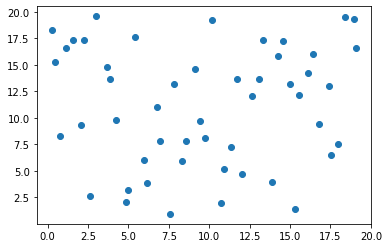

In [11]:
tsp_map.plot_map()

In [12]:
route = tsp_map.generate_route()
print(route)

[0, 5, 1, 47, 34, 10, 18, 43, 3, 26, 35, 16, 27, 48, 8, 11, 23, 20, 46, 25, 6, 42, 44, 41, 15, 45, 36, 49, 21, 22, 40, 14, 38, 28, 12, 31, 7, 32, 30, 39, 24, 19, 13, 17, 9, 29, 4, 33, 37, 2]


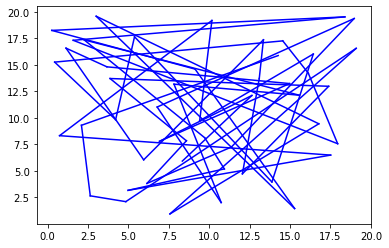

0.0018675263368552347

In [13]:

route = tsp_map.generate_route()
tsp_map.plot_route(route)
tsp_map.route_fitness(route)

In [14]:
N = 500
L = 50
#list(permutations(list(range(L))))[:N]